# M1 MIAGE SBD
## Kickstarter for the lab session "Differential privacy and the Laplace Mechanism"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import seaborn as sns

## Loading data

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
         'marital-status', 'occupation', 'relationship', 'race',
         'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']

adult = pd.read_csv(url, sep=',', header=None, names=names, na_values='?', engine='python', skipinitialspace=True)

adult.dropna(inplace=True)

adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Performing queries

### Query C: number of non-white people

In [4]:
sum(adult['race'] != 'White')

4229

### Another query: average age of people with income over 50K

In [5]:
adult[adult['income'] == '>50K']['age'].mean()

np.float64(43.95911028236548)

### A histogram query: distribution of the education level

In [6]:
adult['education'].value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

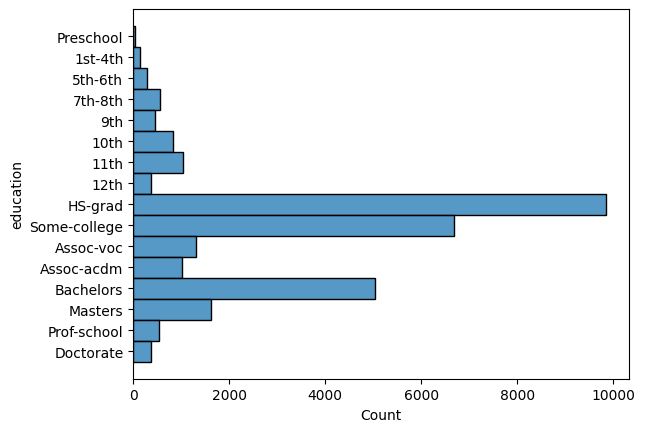

In [7]:
sns.histplot(data=adult.sort_values(by='education-num'), y='education');

### Another histogram query: distribution of working hours per week for people with income over 50K

In [8]:
pd.cut(adult[adult['income'] == '>50K']['hours-per-week'], bins=10).value_counts()

hours-per-week
(30.4, 40.2]     3478
(40.2, 50.0]     2290
(59.8, 69.6]      751
(50.0, 59.8]      435
(69.6, 79.4]      151
(20.6, 30.4]      137
(10.8, 20.6]      114
(79.4, 89.2]       73
(89.2, 99.0]       41
(0.902, 10.8]      38
Name: count, dtype: int64

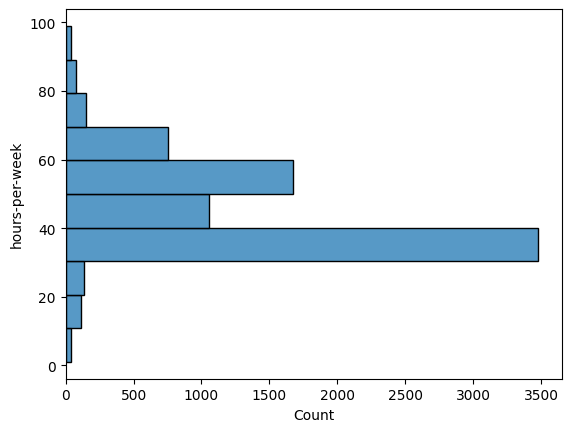

In [9]:
sns.histplot(data=adult[adult['income'] == '>50K'], y='hours-per-week', bins=10);

## How to plot ? By the example...

### Comparing with numpy's Laplace

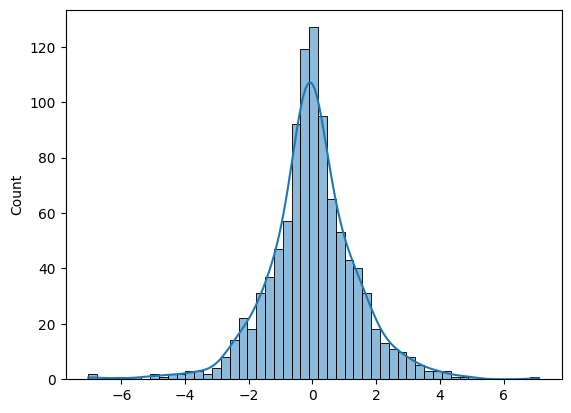

In [10]:
lap = np.random.laplace(loc=0, scale=1, size=1000)

sns.histplot(lap, kde=True);

Kolmogorov-Smirnov test

In [11]:
lap2 = np.random.laplace(loc=0.2, scale=1, size=1000)

ks_2samp(lap, lap2)

KstestResult(statistic=np.float64(0.135), pvalue=np.float64(2.321597219050034e-08), statistic_location=np.float64(0.05783332926748014), statistic_sign=np.int8(1))

### Another plot

C:\Users\PC\AppData\Local\Temp\ipykernel_28820\2990574760.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.lineplot(x='x', y='y', estimator='mean', ci='sd', data=pd.DataFrame({'x': x3, 'y': y}))


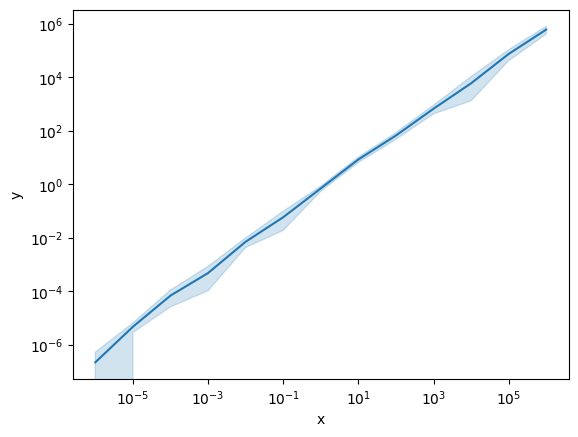

In [12]:
x = np.logspace(-6, 6, num=13)  # [10^-6, 10^-5, ... 10^6]
x3 = np.repeat(x, 3)  # repeat each value 3 times

y = np.random.random(size=len(x3)) * x3

ax = sns.lineplot(x='x', y='y', estimator='mean', ci='sd', data=pd.DataFrame({'x': x3, 'y': y}))
ax.set(xscale='log', yscale='log');

### Yet another plot

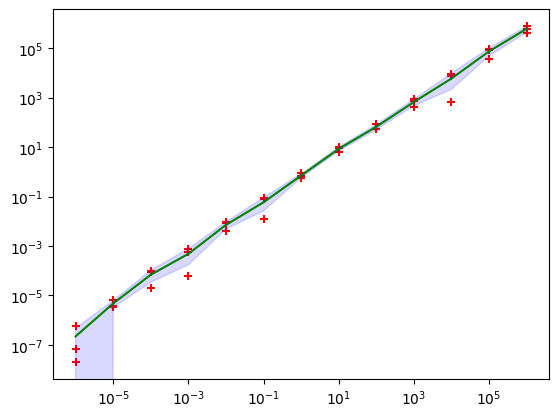

In [13]:
# group repeated values over the same dimension: 
# [[10^-6, 10^-6, 10^-6], [10^-5, 10^-5, 10^-5], ...]
y3 = y.reshape(-1, 3)

# compute average and std for each repeated x value
y_avg = np.mean(y3, axis=1)
y_err = np.std(y3, axis=1)

_, ax = plt.subplots(1)
ax.set(xscale='log', yscale='log')
ax.scatter(x3, y, color='red', marker='+')
ax.plot(x, y_avg, color='green')
ax.fill_between(x, y_avg+y_err, y_avg-y_err, color='blue', alpha=0.15);

 Implementing Laplace

 Q1 Write a function to generate random numbers following the Laplace distribution from the uniform distribution1.

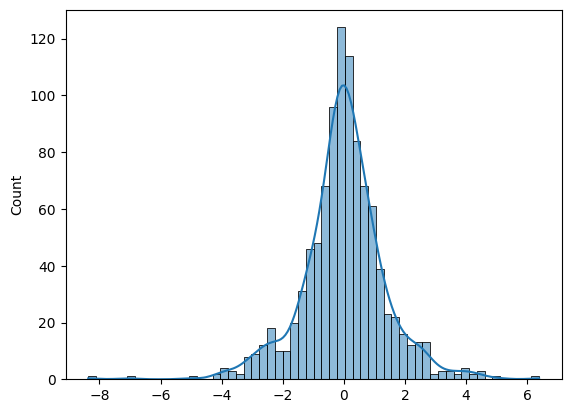

In [14]:
def laplace_from_uniform(loc, scale, size):
    u = np.random.uniform(low=-0.5, high=0.5, size=size)
    return loc - scale * np.sign(u) * np.log(1 - 2 * np.abs(u))

# Example usage:
laplace_samples = laplace_from_uniform(loc=0, scale=1, size=1000)
sns.histplot(laplace_samples, kde=True)
plt.show()

Q2 CompareyourownLaplacegeneratortotheonefromnumpybasedonaKolmogorov–Smirnovtest. Dothey
 generate the same distributions?

In [15]:
ks_2samp(lap, laplace_samples)   # vu que la probalité du pvalue=np.float64(0.6854)  nous avons 68.54% de chance que les deux échantillons proviennent de la même distribution

KstestResult(statistic=np.float64(0.035), pvalue=np.float64(0.5728904395829821), statistic_location=np.float64(-0.1732783103740352), statistic_sign=np.int8(1))

Q3 Write afunction that implements the Laplace mechanism (i.e., perturbing the result of a function based on
 the Laplace distribution parameterized by the privacy parameter and the sensitivity Sg).

In [16]:
def laplace_mechanism(value, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(loc=0, scale=scale)
    return value + noise

# Example usage:
sensitivity = 1.0
epsilon = 0.1
value = 10.0
perturbed_value = laplace_mechanism(value, sensitivity, epsilon)
print(perturbed_value)

12.109211035969473


Studying LaplaceonCountandSumQueries

 Q4 Use the Laplace mechanism,with a varying privacy budget {0.001,0.01,0.1},to compute query C. Execute query C with each value 100 times, and for each execution of a query, measure the relative error2. Plot the average relative error (y-axis) with respect to the value(x-axis). You can use alogarithmic scale on the x-axis for a clearer graph3. Add to each graph, at each value, the standard deviation as a confidence interval.

C:\Users\PC\AppData\Local\Temp\ipykernel_28820\2891539781.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=results_df, ci='sd', markers=True)


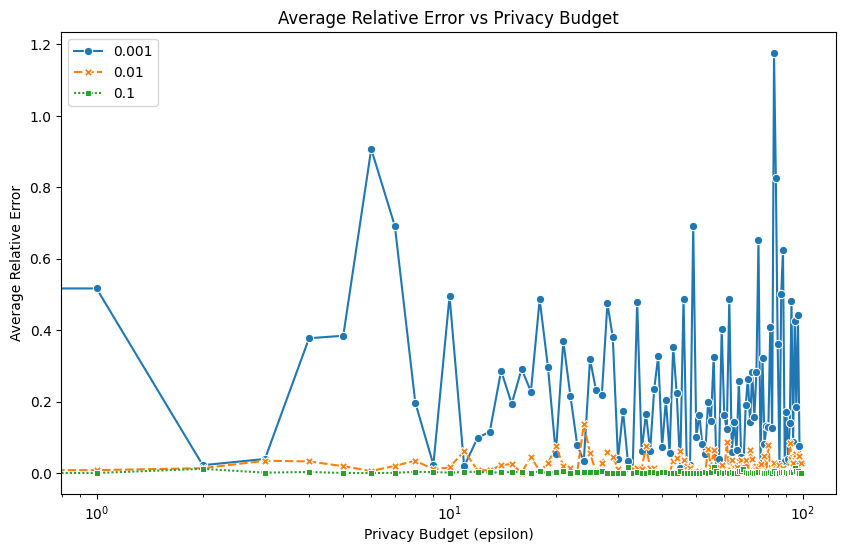

In [17]:
# Define the privacy budgets
epsilon_values = [0.001, 0.01, 0.1]

# Number of executions for each epsilon value
num_executions = 100

# True value of query C
true_value = sum(adult['race'] != 'White')

# Function to compute relative error
def relative_error(true_value, perturbed_value):
    return abs((perturbed_value - true_value)/ true_value) 

# Store results
results = []

for epsilon in epsilon_values:
    errors = []
    for _ in range(num_executions):
        perturbed_value = laplace_mechanism(true_value, sensitivity=1.0, epsilon=epsilon)
        error = relative_error(true_value, perturbed_value)
        errors.append(error)
    results.append(errors)

# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results, index=epsilon_values).T

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, ci='sd', markers=True)
plt.xscale('log')
plt.xlabel('Privacy Budget (epsilon)')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error vs Privacy Budget')
plt.show()

Q5 Compare the relative error that you observe to the parameters of the Laplace distribution used for generating
 the perurbations. What can you observe and why?

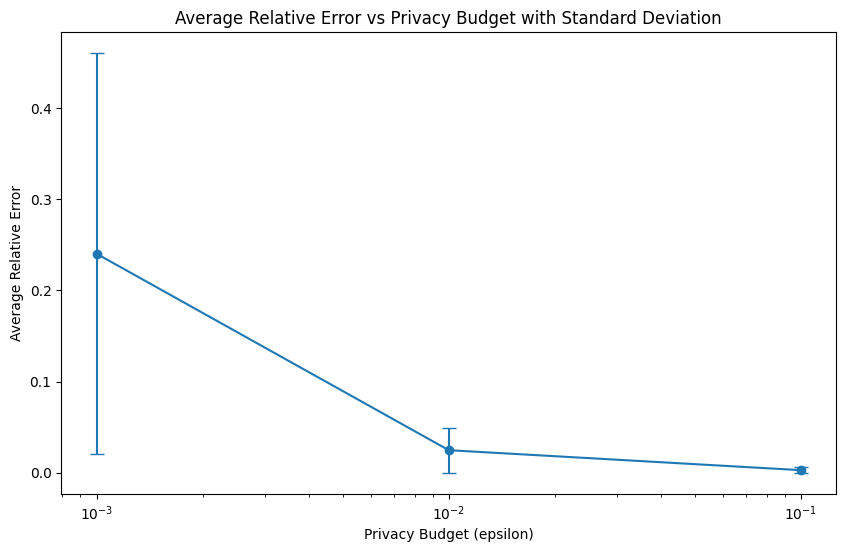

Epsilon: 0.001, Average Relative Error: 0.2403, Standard Deviation: 0.2201
Epsilon: 0.01, Average Relative Error: 0.0246, Standard Deviation: 0.0247
Epsilon: 0.1, Average Relative Error: 0.0027, Standard Deviation: 0.0032


In [18]:
# Calculate the average relative error for each epsilon value
average_relative_errors = results_df.mean()

# Calculate the standard deviation of the relative errors for each epsilon value
std_relative_errors = results_df.std()

# Plot the average relative error with standard deviation as error bars
plt.figure(figsize=(10, 6))
plt.errorbar(epsilon_values, average_relative_errors, yerr=std_relative_errors, fmt='o-', capsize=5)
plt.xscale('log')
plt.xlabel('Privacy Budget (epsilon)')
plt.ylabel('Average Relative Error')
plt.title('Average Relative Error vs Privacy Budget with Standard Deviation')
plt.show()

# Observations
for epsilon, avg_error, std_error in zip(epsilon_values, average_relative_errors, std_relative_errors):
    print(f"Epsilon: {epsilon}, Average Relative Error: {avg_error:.4f}, Standard Deviation: {std_error:.4f}")

Q6 Assume that you allow an unlimited number of queries. How many perturbed answers to query C are needed
 in order to be able to approximate ( 0.1%) the true result of the query? Answer to this question empirically.

In [19]:
# Define the acceptable error margin (0.1% of the true value)
acceptable_error_margin = 0.001 * true_value

# Function to check if the relative error is within the acceptable margin
def is_within_margin(perturbed_value, true_value, margin):
    return abs(perturbed_value - true_value) <= margin

# Generate perturbed answers and check if they are within the acceptable margin
num_queries = 0
num_within_margin = 0

while num_within_margin < 1:
    perturbed_value = laplace_mechanism(true_value, sensitivity=1.0, epsilon=0.1)
    num_queries += 1
    if is_within_margin(perturbed_value, true_value, acceptable_error_margin):
        num_within_margin += 1

print(f"Number of perturbed answers needed: {num_queries}")

Number of perturbed answers needed: 2
